<a href="https://colab.research.google.com/github/namans-git/iit_intern/blob/main/ols_mle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ordinary Least Squares and Maximum Likelihood Estimation

OLS or linear least squares, is a method for approximately determining the unknown parameters located in a linear regression model. The ordinary least squares is obtained by minimizing the total of squared vertical distances between the observed responses within the dataset and the responses predicted by the linear approximation [14].

The OLS is a **distance-minimizing approximation/estimation** method, while MLE is a **"likelihood" maximization** method.

OLS needs no stochastic assumptions to provide its distance-minimizing solution, while MLE starts by assuming a joint probability density/mass function.

In [ ]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [ ]:
# generate data

#no of data points
N = 100

#creating an independent variable
x = np.linspace(0,20,N)

#normally distributed residual/error
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)

#generate ground truth
y = 3*x + ϵ

df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

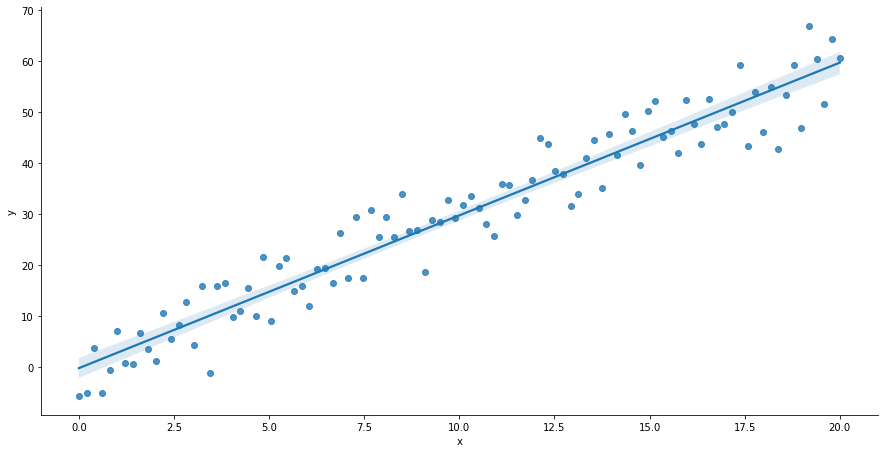

In [ ]:
# plot
g = sns.regplot(df.x, df.y)
g.figure.set_size_inches(15, 7.5)
sns.despine()

In [ ]:
# split features and target
X = df[['constant', 'x']]

# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1274.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           5.69e-58
Time:                        12:05:40   Log-Likelihood:                -299.85
No. Observations:                 100   AIC:                             603.7
Df Residuals:                      98   BIC:                             608.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.2834      0.973     -0.291      0.771      -2.215       1.648
x              3.0008      0.084     35.698      0.000       2.834       3.168
==============================================================================
Omnibus:                        2.315   Durbin-Watson:                   2.463
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.871
Skew:                          -0.188   Prob(JB):                        0.392
Kurtosis:                       2.446   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Maximizing LL to solve for Optimal Coefficients

In [ ]:
# we'll try to calculate the same ols results using mle methods
# because scipy.optimize has only a minimize method, we'll minimize the negative of the log-likelihood.

In [ ]:
# define likelihood function
def MLERegression(params):
 intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
 yhat = intercept + beta*x # predictions

# next, we flip the Bayesian question
# compute PDF of observed values normally distributed around mean (yhat)
# with a standard deviation of sd
 negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
# return negative LL
 return(negLL)

In [ ]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead',
 options={'disp': True})

Optimization terminated successfully.
         Current function value: 299.849957
         Iterations: 114
         Function evaluations: 197


In [ ]:
results

 final_simplex: (array([[-0.2834674 ,  3.00083396,  4.85283508],
       [-0.2833995 ,  3.00082959,  4.85280701],
       [-0.28346188,  3.00083434,  4.85279994],
       [-0.28346174,  3.00083138,  4.85281798]]), array([299.84995653, 299.84995653, 299.84995653, 299.84995653]))
           fun: 299.8499565272882
       message: 'Optimization terminated successfully.'
          nfev: 197
           nit: 114
        status: 0
       success: True
             x: array([-0.2834674 ,  3.00083396,  4.85283508])

In [ ]:
resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']
np.round(resultsdf.head(2), 4)

,coef
constant,-0.2835
x,3.0008
